In [1]:
%matplotlib notebook
from BTC_fixed_h import *
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

def draw(net):
    """
    Draws the network net using dot layout.
    """
    pos = graphviz_layout(net, prog='dot')
    nx.draw_networkx(net, pos, labels=nx.get_node_attributes(net,'label'))

# Sequential Generator

In the next chunk of code, set `n` and `h` to any (small) values with `h<n` and execute it. Clicking "next" in the plot will sequentially generate all BTC networks with `n` leaves and `h` hybrid nodes. 

Caution: Due to the implementation of `itertools.product`, which is used in `BTC_fixed_h.py`, it can take quite long to generate the first network for values of `n>6`.

<IPython.core.display.Javascript object>


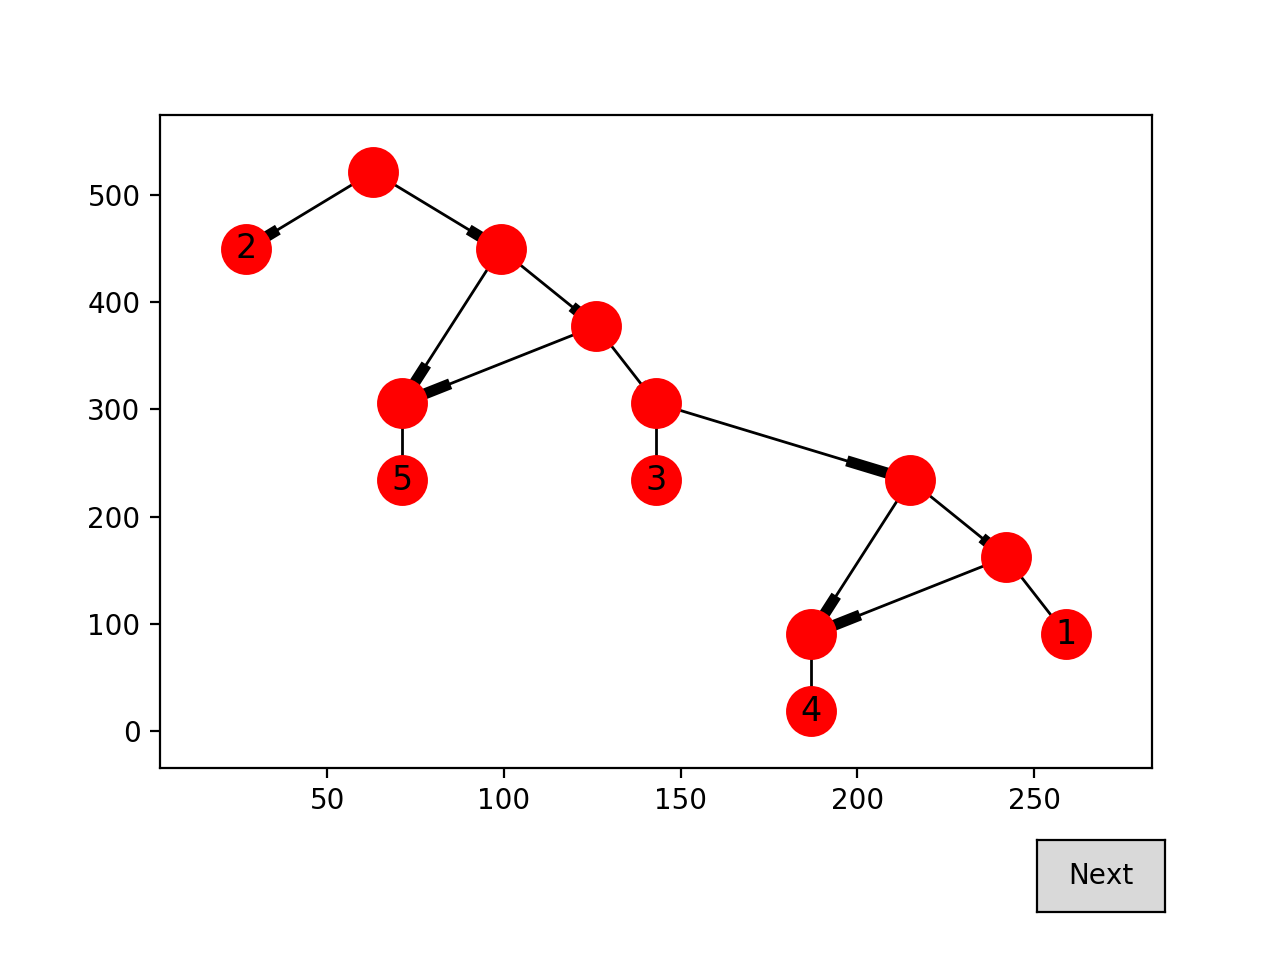

tree_annotqtions_generator
tree_annotqtions_generator
tree_annotqtions_generator
tree_annotqtions_generator
tree_annotqtions_generator


In [5]:
n = 5
taxa = list(range(1,n+1))
h = 2
btc = BTC_generator(taxa,h)

fig, ax = plt.subplots()
xx=fig.get_axes()[0]
plt.subplots_adjust(bottom=0.2)

class Index(object):
    net = btc.__next__()
    plt.sca(xx)
    plt.cla()
    draw(net)

    def next(self, event):
        try:
            self.net = btc.__next__()
            plt.sca(xx)
            plt.cla()
            draw(self.net)
        except:
            plt.close()

callback = Index()
axnext = plt.axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)

plt.show()